In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### What variables are important for teams to win?

In [2]:
team = pd.read_csv('data/baseball/team.csv')

In [3]:
team = team[team.year >= 1985]
team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1917 to 2804
Data columns (total 48 columns):
year                888 non-null int64
league_id           888 non-null object
team_id             888 non-null object
franchise_id        888 non-null object
div_id              888 non-null object
rank                888 non-null int64
g                   888 non-null int64
ghome               888 non-null float64
w                   888 non-null int64
l                   888 non-null int64
div_win             860 non-null object
wc_win              624 non-null object
lg_win              860 non-null object
ws_win              860 non-null object
r                   888 non-null int64
ab                  888 non-null int64
h                   888 non-null int64
double              888 non-null int64
triple              888 non-null int64
hr                  888 non-null int64
bb                  888 non-null int64
so                  888 non-null float64
sb                  8

In [8]:
team['w_pct'] = team.w / 162
team['avg'] = team.h / team.ab
team['2b_avg'] = team.double / team.ab
team['3b_avg'] = team.triple / team.ab
team['hr_avg'] = team.hr / team.ab
team['r_avg'] = team.r / team.ab
team['so_avg'] = team.so / (162*27)
team['era_adj'] = team.era / 27
team['e_avg'] = team.e / (162*27)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
clean = team[['w_pct','r_avg','avg','so_avg','era_adj','e_avg']]
clean.describe()

,w_pct,r_avg,avg,so_avg,era_adj,e_avg
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.493278,0.133540,0.261666,0.236956,0.155800,0.025017
std,0.073345,0.014543,0.011896,0.035185,0.020758,0.004576
min,0.265432,0.094146,0.226483,0.129858,0.107778,0.012346
25%,0.442901,0.123301,0.253077,0.211706,0.140370,0.021719
50%,0.493827,0.132741,0.261446,0.236740,0.154444,0.024691
75%,0.549383,0.143036,0.269449,0.259088,0.169630,0.028121
max,0.716049,0.179091,0.293993,0.350937,0.236296,0.040924


In [11]:
y = clean.pop('w_pct')

In [12]:
X = clean

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [16]:
tree = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=45, random_state=42)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=45, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [17]:
tree.feature_importances_

array([ 0.40175878,  0.0168238 ,  0.10591422,  0.46230688,  0.01319632])

In [18]:
cross_val_score(tree, X_train, y_train, cv=5).mean()

0.59681904312539347

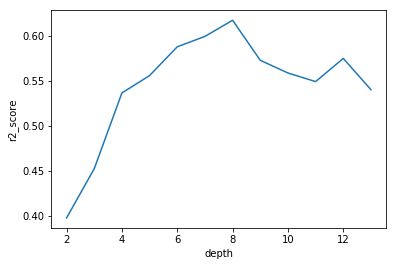

In [37]:
score = []
test_range = np.arange(2,14,1)
for depth in test_range:
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train,y_train)
    score.append(cross_val_score(tree, X_train, y_train, cv=5).mean())
plt.plot(test_range,score)
plt.xlabel('depth')
plt.ylabel('r2_score')

#### Testing other models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [22]:
lin = LinearRegression()
lin.fit(X_train,y_train)
results = lin.predict(X_test)
mean_squared_error(y_test, results)

0.00095753362674299875

In [23]:
cross_val_score(lin, X_train, y_train, cv=5).mean()

0.75272125766690057

In [24]:
lin.coef_

array([ 2.95237731,  1.00862324,  0.44857996, -2.85973586, -0.11309823])

In [26]:
lscv = LassoCV(eps=0.004)
lscv.fit(X_train,y_train)
results = lscv.predict(X_test)
mean_squared_error(y_test, results)

0.00096634988868937711

In [27]:
cross_val_score(lscv, X_train, y_train, cv=5).mean()

0.75244267003500709

In [28]:
lscv.coef_

array([ 2.9579522 ,  0.87291588,  0.42571551, -2.81092714, -0.        ])

In [29]:
svr = SVR(C=1000,epsilon=0.039)
svr.fit(X_train,y_train)
results = svr.predict(X_test)
mean_squared_error(y_test, results)

0.00087838989686641873

In [30]:
cross_val_score(svr, X_train, y_train, cv=5).mean()

0.79141345039813582

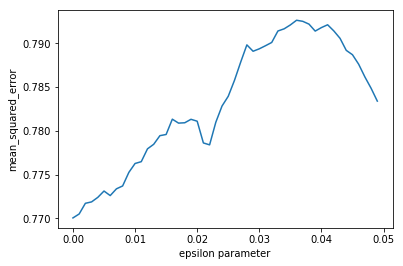

In [38]:
score = []
test_range = np.arange(0,0.05,0.001)
for e in test_range:
    svr = SVR(C=1000,epsilon=e)
    svr.fit(X_train,y_train)
    score.append(cross_val_score(svr, X_train, y_train, cv=5).mean())
plt.plot(test_range,score)
plt.xlabel('epsilon parameter')
plt.ylabel('mean_squared_error')

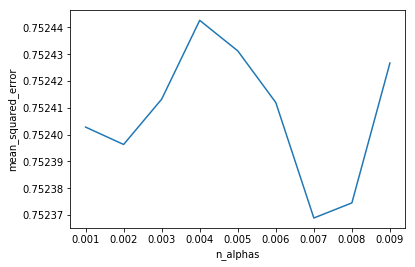

In [41]:
score = []
test_range = np.arange(0.001,0.01,0.001)
for eps in test_range:
    lscv = LassoCV(eps=eps)
    lscv.fit(X_train,y_train)
    score.append(cross_val_score(lscv, X_train, y_train, cv=5).mean())
plt.plot(test_range,score)
plt.xlabel('n_alphas')
plt.ylabel('mean_squared_error')

### What is important for players?

In [43]:
batting = pd.read_csv('data/baseball/batting.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')
salary = pd.read_csv('data/baseball/salary.csv')

In [44]:
batting = batting[(batting.year >= 1985) & (batting.ab > 100)]
pitching = pitching[pitching.year >= 1985]

In [45]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12936 entries, 62240 to 101330
Data columns (total 22 columns):
player_id    12936 non-null object
year         12936 non-null int64
stint        12936 non-null int64
team_id      12936 non-null object
league_id    12936 non-null object
g            12936 non-null int64
ab           12936 non-null float64
r            12936 non-null float64
h            12936 non-null float64
double       12936 non-null float64
triple       12936 non-null float64
hr           12936 non-null float64
rbi          12936 non-null float64
sb           12936 non-null float64
cs           12936 non-null float64
bb           12936 non-null float64
so           12936 non-null float64
ibb          12936 non-null float64
hbp          12936 non-null float64
sh           12936 non-null float64
sf           12936 non-null float64
g_idp        12936 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 2.3+ MB


In [46]:
batting['avg'] = batting.h / batting.ab
batting['2b_avg'] = batting.double / batting.ab
batting['3b_avg'] = batting.triple / batting.ab
batting['hr_avg'] = batting.hr / batting.ab
batting['r_avg'] = batting.r / batting.ab
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['slug'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3) / batting.ab
batting['bb_avg'] = batting.bb / batting.ab

In [47]:
### OBP is the most important
clean_batting = batting[['r_avg','avg','obp','slug']].dropna()
clean_batting.describe()

,r_avg,avg,obp,slug
count,12936.000000,12936.000000,12936.000000,12936.000000
mean,0.131785,0.261167,0.330924,0.406472
std,0.033729,0.034964,0.042251,0.080390
min,0.009091,0.122642,0.173077,0.158416
25%,0.108904,0.239256,0.303704,0.350758
50%,0.131089,0.262032,0.330472,0.401796
75%,0.153614,0.284647,0.357895,0.457627
max,0.345845,0.395722,0.612378,0.863445


In [27]:
# What part of OBP is most important?
clean_batting = batting[['r_avg','avg','2b_avg','3b_avg','hr_avg','bb_avg']].dropna()
clean_batting.describe()

,r_avg,avg,2b_avg,3b_avg,hr_avg,bb_avg
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.124338,0.254533,0.050761,0.006035,0.029847,0.086219
std,0.030207,0.034052,0.014138,0.006451,0.018075,0.037831
min,0.037736,0.145631,0.007463,0.000000,0.000000,0.014085
25%,0.104934,0.232567,0.041061,0.000000,0.016857,0.060483
50%,0.124277,0.257991,0.050445,0.004310,0.028112,0.080321
75%,0.142857,0.278144,0.059258,0.009153,0.040036,0.105409
max,0.226488,0.337995,0.094421,0.033113,0.099010,0.262385


In [48]:
y = clean_batting.pop('r_avg')

In [49]:
X = clean_batting

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
tree = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=23, random_state=42)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=23, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [67]:
tree.feature_importances_

array([ 0.00335609,  0.72663843,  0.27000548])

In [68]:
cross_val_score(tree, X_train, y_train, cv=5).mean()

0.46216660462275944

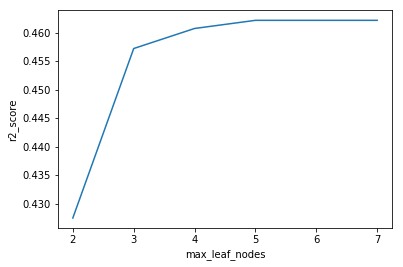

In [65]:
score = []
test_range = np.arange(2,8)
for depth in test_range:
    tree = DecisionTreeRegressor(max_depth=depth,max_leaf_nodes=23)
    tree.fit(X_train,y_train)
    score.append(cross_val_score(tree, X_train, y_train, cv=5).mean())
plt.plot(test_range,score)
plt.xlabel('max_leaf_nodes')
plt.ylabel('r2_score')

In [69]:
images = []
for c in tree.estimators_:
    dot_data = tree.export_graphviz(c, out_file=None)  
    graph = pydotplus.graph_from_dot_data(dot_data)
    images.append(Image(graph.create_png(), width=100, height=100))
display(*images)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'estimators_'

### Salary

In [15]:
batting = pd.read_csv('data/baseball/batting.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')
salary = pd.read_csv('data/baseball/salary.csv')
batting = batting[(batting.year == 2015) & (batting.ab > 100)]
batting['avg'] = batting.h / batting.ab
batting['2b_avg'] = batting.double / batting.ab
batting['3b_avg'] = batting.triple / batting.ab
batting['hr_avg'] = batting.hr / batting.ab
batting['r_avg'] = batting.r / batting.ab
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['slug'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3) / batting.ab
batting['bb_avg'] = batting.bb / batting.ab
batting_salary = salary.merge(batting)

In [45]:
clean_batting = batting_salary[['salary','avg','hr_avg','bb_avg']].dropna()
clean_batting.describe()

,salary,avg,hr_avg,bb_avg
count,3.410000e+02,341.000000,341.000000,341.000000
mean,5.430086e+06,0.254320,0.029521,0.087685
std,6.104767e+06,0.034310,0.017418,0.038336
min,5.075000e+05,0.145631,0.000000,0.015873
25%,5.340000e+05,0.231405,0.016892,0.061828
50%,2.725000e+06,0.257732,0.027972,0.083032
75%,8.000000e+06,0.278157,0.039877,0.107477
max,2.500000e+07,0.337995,0.096774,0.262385


In [46]:
y = clean_batting.pop('salary')

In [47]:
X = clean_batting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/jnelson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [48]:
y = np.log(y)
X = sm.add_constant(X)
results = smf.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     12.70
Date:                Thu, 16 Nov 2017   Prob (F-statistic):           6.96e-08
Time:                        15:31:18   Log-Likelihood:                -554.24
No. Observations:                 341   AIC:                             1116.
Df Residuals:                     337   BIC:                             1132.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5835      0.521     24.146      0.0

In [25]:
tree.feature_importances_

array([ 0.10033528,  0.12938248,  0.11355568,  0.28512085,  0.17871328,
        0.19289243])